##Importing Libraries 

In [ ]:
#Importing Libraries 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import xlrd
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from seaborn import pairplot
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import kendalltau
!pip install varname

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Saving data links

In [ ]:
#Saving data link
cabdata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
citydata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
customerdata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
tranx_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'


##Loading the data

In [ ]:
#loading data
cabdata = pd.read_csv(cabdata_link)
citydata = pd.read_csv(citydata_link)
customerdata = pd.read_csv(customerdata_link)
tranxdata = pd.read_csv(tranx_link)

##Checking the data info

In [ ]:
def data_dim(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  dim = data.shape
  print('{} has {} entries and {} variables'.format(name, dim[0], dim[1]))

In [ ]:
datas = [cabdata, citydata, customerdata, tranxdata]

for x in datas: 
  data_dim(x)

cabdata has 359392 entries and 7 variables
citydata has 20 entries and 3 variables
customerdata has 49171 entries and 4 variables
tranxdata has 440098 entries and 3 variables


In [ ]:
def data_desc(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  desc = data.describe()
  print('This is {} info:'.format(name))
  print(desc, '\n')

In [ ]:
for x in datas: 
  data_desc(x)

This is cabdata info:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000   

This is citydata info:
               City   Population      Users
count            20           20         20
unique           2

In [ ]:
def data_head(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  data_h = data.head
  print('THIS IS {} FIRST 5 ROws:'.format(name))
  print(data_h, '\n')

In [ ]:
for x in datas: 
  data_head(x)

THIS IS cabdata FIRST 5 ROws:
<bound method NDFrame.head of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1      

In [ ]:
def data_info(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  
  print('THIS IS {} INFO:'.format(name))
  data_in = data.info()
  print(data_in, '\n')

In [ ]:
for x in datas: 
  data_info(x)

THIS IS cabdata INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 

THIS IS citydata INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None 

THIS IS

In [ ]:
def data_NA(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  data_na = data.isnull().sum().sum()
  print('THERE ARE {} NAs in {}'.format(data_na, name))
  

In [ ]:
for x in datas: 
  data_NA(x)

THERE ARE 0 NAs in cabdata
THERE ARE 0 NAs in citydata
THERE ARE 0 NAs in customerdata
THERE ARE 0 NAs in tranxdata


###The number of cities in City data and how many times they are represented.

### Replacing ',' with '' in Population and User variables in City data 

In [ ]:
citydata['Population'] = citydata['Population'].str.replace(',', '').astype(int)
citydata['Users'] = citydata['Users'].str.replace(',', '').astype(int)

### COnverting date column in Cab data to Year Month and Day format

In [ ]:
cabdata.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [ ]:
cabdata.loc[:, 'Date of Travel'] = cabdata.loc[:, 'Date of Travel'].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))


In [ ]:
cabdata['Date of Travel'].dtypes

dtype('<M8[ns]')

In [ ]:
cabdata['Year'] = cabdata['Date of Travel'].dt.year
cabdata['Month'] = cabdata['Date of Travel'].dt.month

2017    128510
2018    123563
2016    107319
Name: Year, dtype: int64

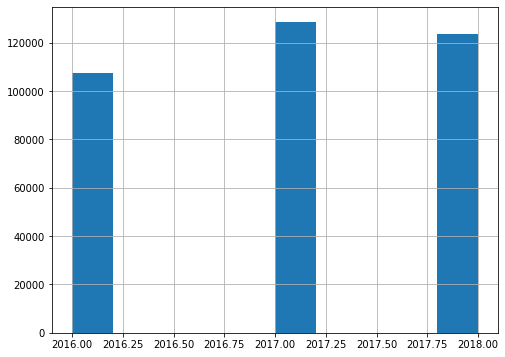

In [ ]:
cabdata['Year'].hist( figsize=(8,6))
cabdata['Year'].value_counts()

12    47007
11    42700
10    40852
9     36859
8     31323
7     27676
6     24713
5     23701
1     23174
3     21646
4     21434
2     18307
Name: Month, dtype: int64

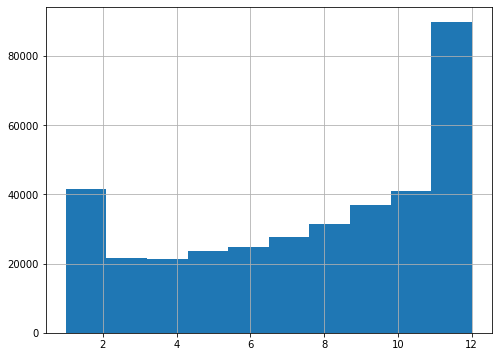

In [ ]:
cabdata['Month'].hist(figsize=(8,6))
cabdata['Month'].value_counts()

Encoding date variables

In [ ]:
def date_encode (data, col, max):
  data[col + '_sine'] = np.sin(2 * np.pi * data[col]/max)
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max)
  return data

In [ ]:
date_encode(cabdata, 'Month', 12)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Month_sine,Month_cos
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,0.5,0.866025
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,0.5,0.866025
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,0.5,0.866025
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,0.5,0.866025
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,0.5,0.866025
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,0.5,0.866025
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,0.5,0.866025
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,0.5,0.866025


### Replacing ' ' in data frame column names with '_'

In [ ]:
cabdata.columns = [c.replace(' ', '_') for c in cabdata.columns] 
customerdata.columns = [c.replace(' ', '_') for c in customerdata.columns] 
tranxdata.columns = [c.replace(' ', '_') for c in tranxdata.columns] 

###Merging Cab data and Transaction data 

In [ ]:
merged_data_df = pd.merge(cabdata,  tranxdata, how = 'outer', on = 'Transaction_ID')
merged_data_df['Profit'] = merged_data_df['Price_Charged'] - merged_data_df['Cost_of_Trip']
merged_data_df

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Month_sine,Month_cos,Customer_ID,Payment_Mode,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016.0,1.0,0.5,0.866025,29290,Card,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016.0,1.0,0.5,0.866025,27703,Card,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016.0,1.0,0.5,0.866025,28712,Cash,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016.0,1.0,0.5,0.866025,28020,Cash,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016.0,1.0,0.5,0.866025,27182,Card,16.844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440078,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51612,Cash,NaN
440094,10440091,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53963,Card,NaN
440095,10440102,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52526,Cash,NaN
440096,10440103,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53171,Card,NaN


Chacking if log will affect the distribution of the dependent variable 

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0.5, 1.0, 'Log Profit Distribution')]

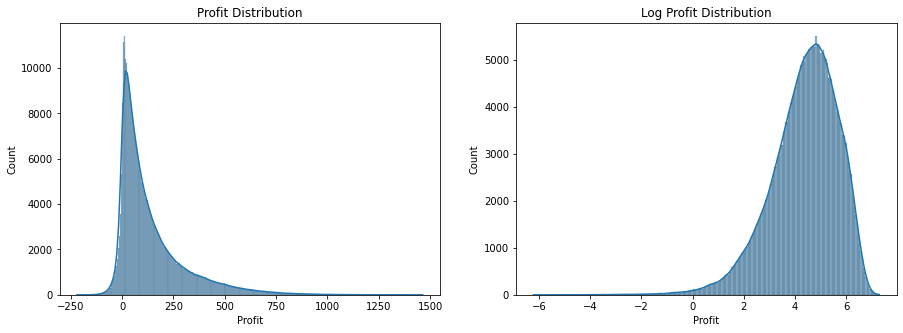

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(merged_data_df['Profit'], kde = True, ax = ax1).set(title = 'Profit Distribution')
sns.histplot(np.log(merged_data_df['Profit']), kde = True, ax = ax2).set(title = 'Log Profit Distribution')

###Merging Customer data with the merged data

In [ ]:
merged_data_df2 = pd.merge(merged_data_df, customerdata, how = 'outer', on = 'Customer_ID')
merged_data_df2.rename(columns = {'Income_(USD/Month)': 'Income'}, inplace = True)
merged_data_df2

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Month_sine,Month_cos,Customer_ID,Payment_Mode,Profit,Gender,Age,Income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016.0,1.0,0.500000,0.866025,29290,Card,57.3150,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018.0,7.0,-0.500000,-0.866025,29290,Cash,281.2772,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018.0,11.0,-0.500000,0.866025,29290,Card,194.6480,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016.0,1.0,0.500000,0.866025,27703,Card,23.6660,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018.0,4.0,0.866025,-0.500000,27703,Card,253.9808,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382,Card,NaN,Female,51,18919
440094,10439409,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420,Card,NaN,Female,18,4531
440095,10439413,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888,Card,NaN,Male,23,3226
440096,10439418,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456,Cash,NaN,Male,20,30662


In [ ]:
len(merged_data_df2.columns)

17

In [ ]:
datadf = pd.merge(merged_data_df2, citydata)

There is atleast one relationship between the different dataframe supplied for this project. The Cabdata from the companies has transaction ID which is unique and the transaction data also has the same. After merging the Cabdata and the transaction data, the customer data has the customer ID column which can also be found in the merged data. To merge teh city data with the remaining, the city columns was used which can be found in the two dataset. This helped removed some uncessary rows in the existing dataframe. 

Removing Outliers 

In [ ]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Month_sine',
       'Month_cos', 'Customer_ID', 'Payment_Mode', 'Profit', 'Gender', 'Age',
       'Income', 'Population', 'Users'],
      dtype='object')

In [ ]:
from scipy import stats
datadf2 = datadf.loc[:, ~datadf.columns.isin (['Date_of_Travel', 'Year'])]
datadf2 = datadf2.select_dtypes(include = ['int64', 'float64'])

In [ ]:
datadf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   KM_Travelled    359392 non-null  float64
 2   Price_Charged   359392 non-null  float64
 3   Cost_of_Trip    359392 non-null  float64
 4   Month           359392 non-null  float64
 5   Month_sine      359392 non-null  float64
 6   Month_cos       359392 non-null  float64
 7   Customer_ID     359392 non-null  int64  
 8   Profit          359392 non-null  float64
 9   Age             359392 non-null  int64  
 10  Income          359392 non-null  int64  
 11  Population      359392 non-null  int64  
 12  Users           359392 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 38.4 MB


In [ ]:
from scipy import stats
rm_out = datadf2[(np.abs(stats.zscore(datadf2)) < 3).all(axis=1)]

In [ ]:
datadf = datadf.loc[rm_out.index, :]

In [ ]:
datadf.isnull().sum().sum()

0

In [ ]:
#Checking duplicate rows
datadf.duplicated().sum()

0

In [ ]:
datadf.dtypes

Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
Year                     float64
Month                    float64
Month_sine               float64
Month_cos                float64
Customer_ID                int64
Payment_Mode              object
Profit                   float64
Gender                    object
Age                        int64
Income                     int64
Population                 int64
Users                      int64
dtype: object

In [ ]:
datadf.shape

(352121, 19)

Descriptive Analysis to COmpare Yellow Cab to Pink Cab

In [ ]:
def agebracket(x): 
  if x < 65: 
    return('less than 65')
  else: 
    return('Above 65')

In [ ]:
datadf['Age_range'] = datadf.Age.apply(agebracket)

In [ ]:
datadf['City'].value_counts()

NEW YORK NY       93014
CHICAGO IL        56621
LOS ANGELES CA    47981
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20485
SILICON VALLEY     8434
SEATTLE WA         7993
ATLANTA GA         7544
DALLAS TX          6913
MIAMI FL           6414
AUSTIN TX          4876
ORANGE COUNTY      3941
DENVER CO          3811
NASHVILLE TN       3007
SACRAMENTO CA      2364
PHOENIX AZ         2063
TUCSON AZ          1928
PITTSBURGH PA      1303
Name: City, dtype: int64

In [ ]:
datadf['Gender'].value_counts()

Male      201454
Female    150667
Name: Gender, dtype: int64

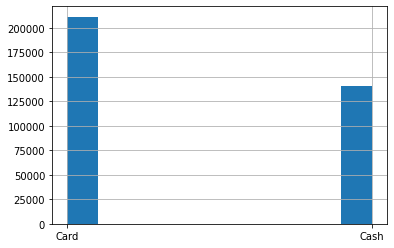

In [ ]:
datadf['Payment_Mode'].hist()

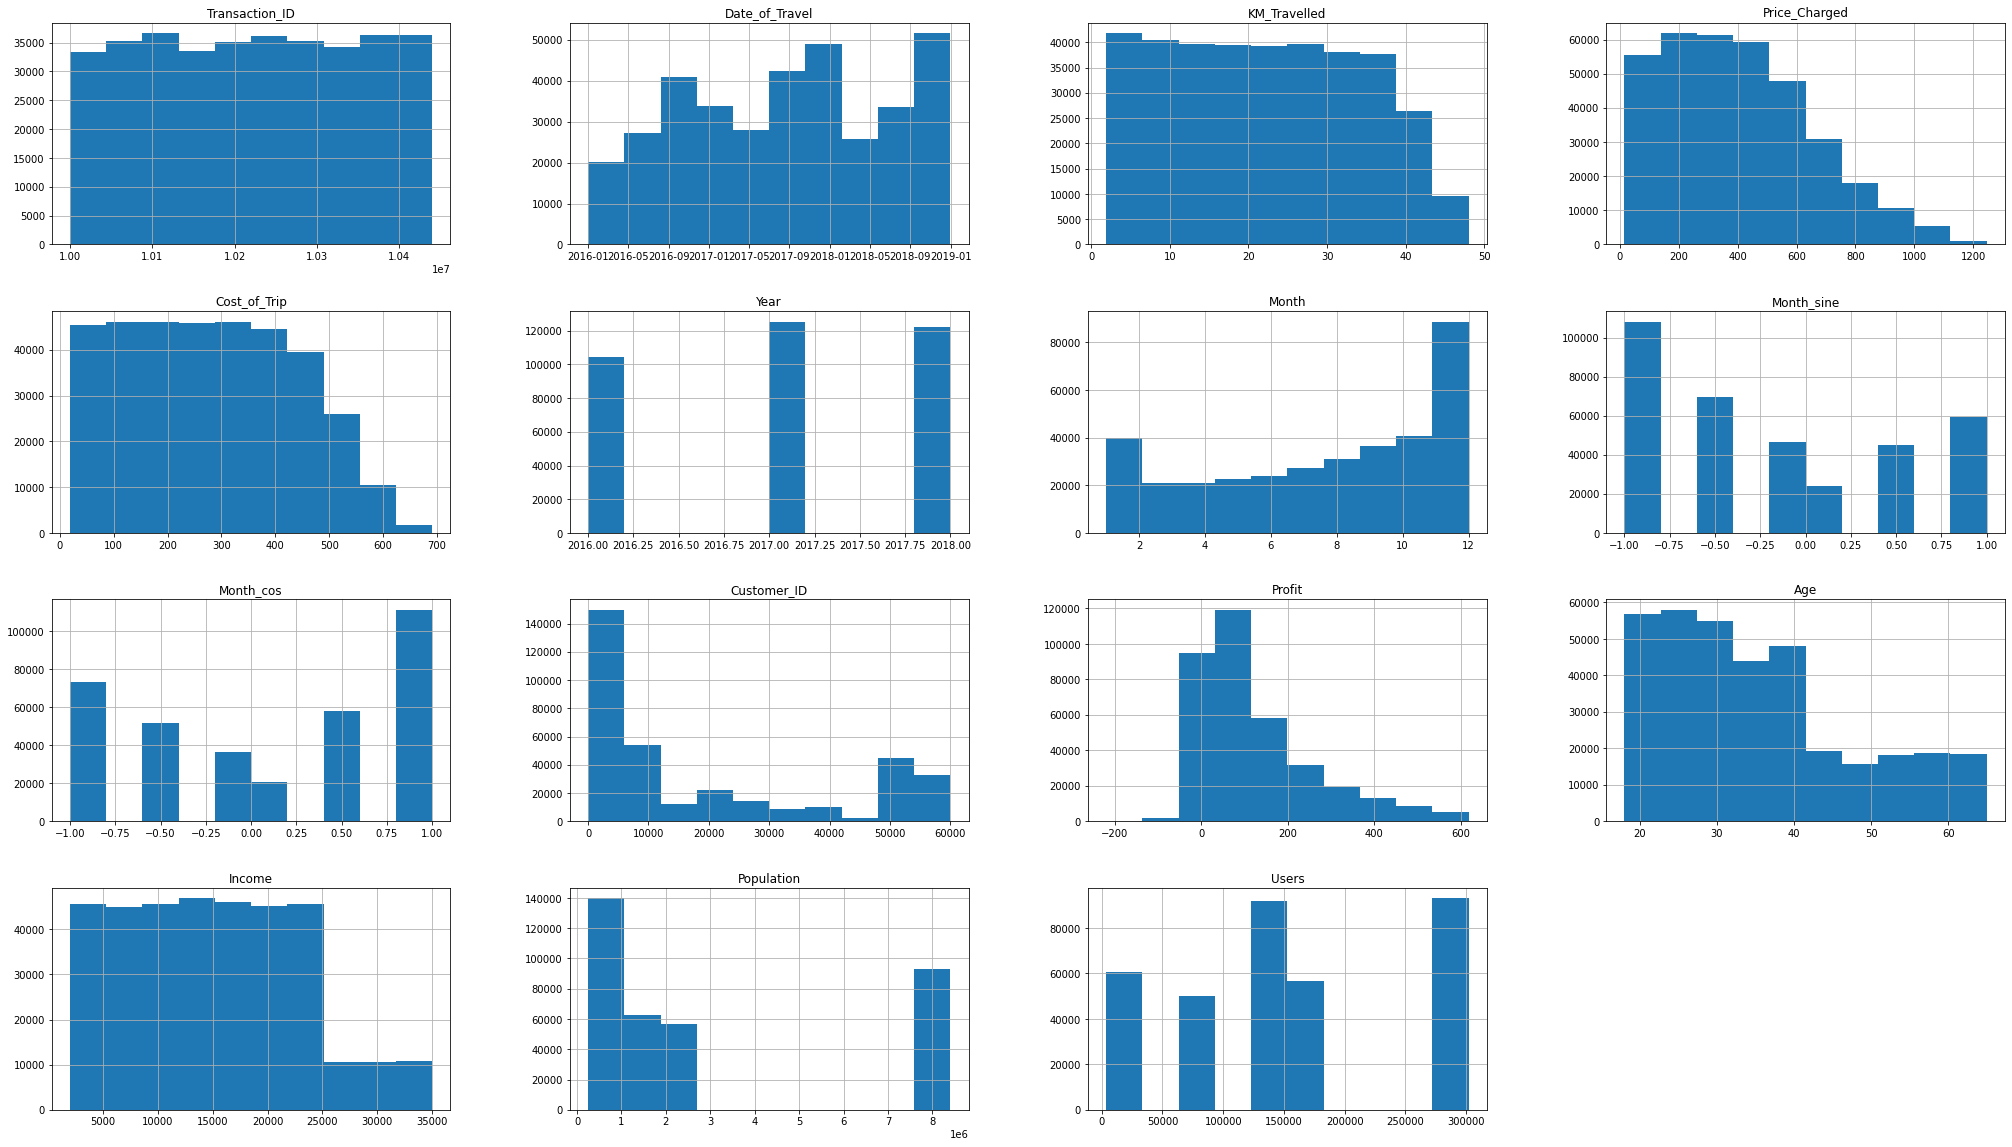

In [ ]:
datadf.hist(figsize = (35,20))
plt.show()
#This shows the destribution of the data. None of the numeric variables are uniformly distributed. 

In [ ]:
bothcompany = datadf['Company'].value_counts()/datadf['Company'].size *100

Text(0.5, 1.0, 'Activities Frequency of Both Company')

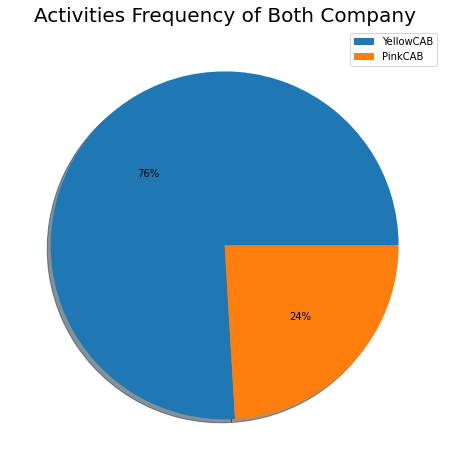

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(bothcompany, shadow = True,  autopct='%1.0f%%',)
plt.legend(['YellowCAB', 'PinkCAB'])
plt.title('Activities Frequency of Both Company', size = 20)

In [ ]:
datadf['Cost_per_km'] = datadf['Cost_of_Trip']/ datadf['KM_Travelled']
datadf['Perc_Users'] = datadf['Users']/ datadf['Population']

In [ ]:
PinkCab = datadf[datadf['Company'] == 'Pink Cab']
YellowCab = datadf[datadf['Company'] == 'Yellow Cab']

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


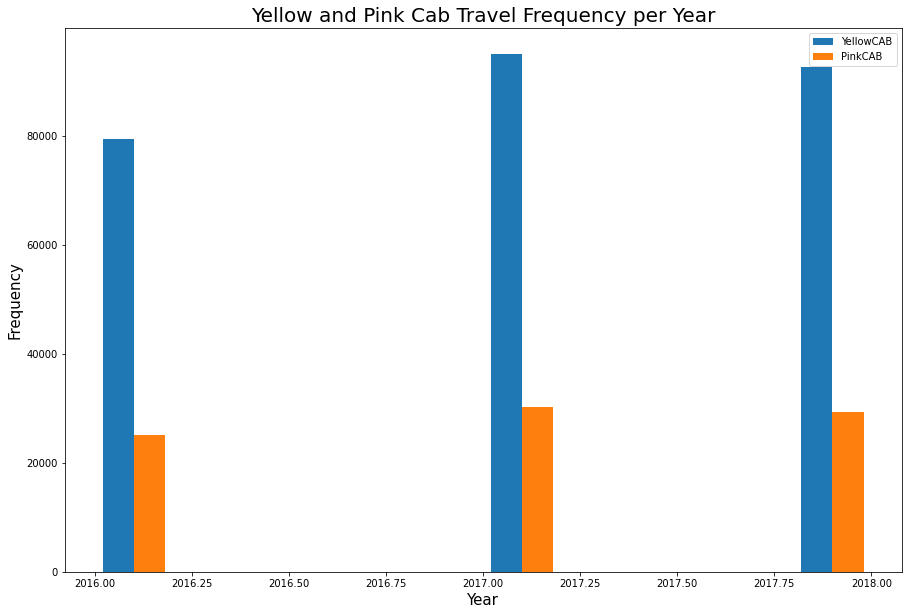

In [ ]:
plt.figure(figsize = (15,10))
plt.hist([YellowCab['Year'], PinkCab['Year']],  label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Travel Frequency per Year', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

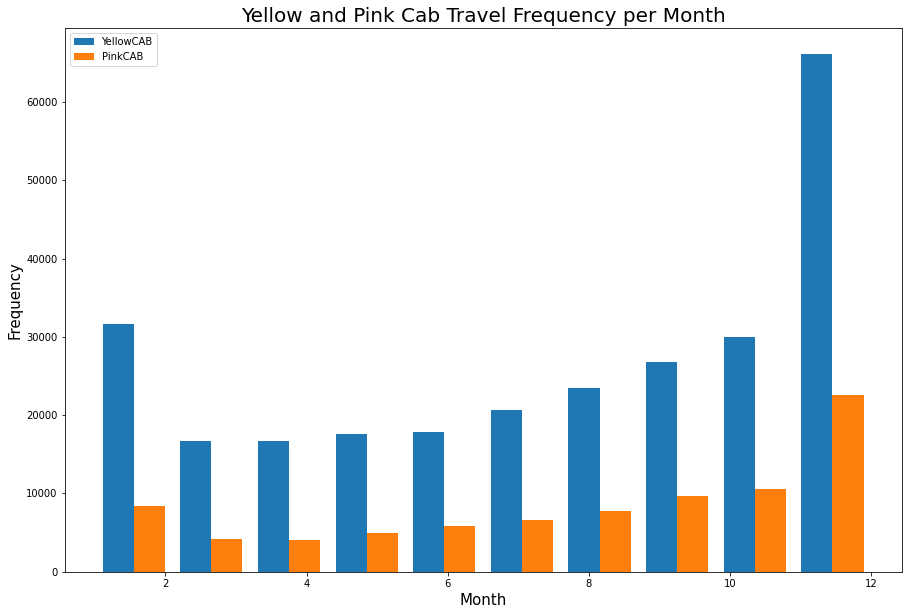

In [ ]:

plt.figure(figsize = (15,10))
plt.hist([YellowCab['Date_of_Travel'].dt.month, PinkCab['Date_of_Travel'].dt.month], label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Travel Frequency per Month', size = 20)
plt.xlabel("Month", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

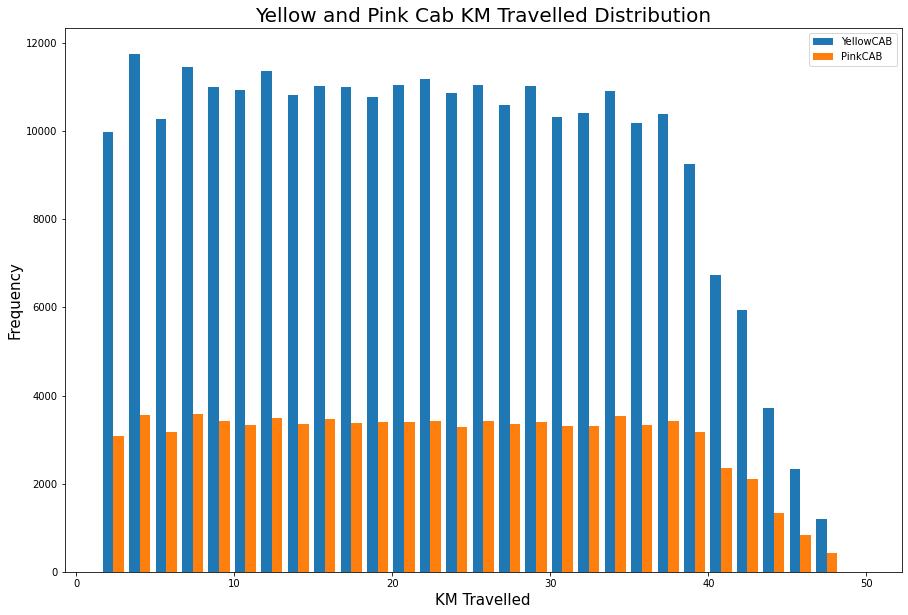

In [ ]:
bins = np.linspace(1.5, 50, 30)
plt.figure(figsize = (15,10))
plt.hist([YellowCab['KM_Travelled'], PinkCab['KM_Travelled']], bins, label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab KM Travelled Distribution', size = 20)
plt.xlabel("KM Travelled", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

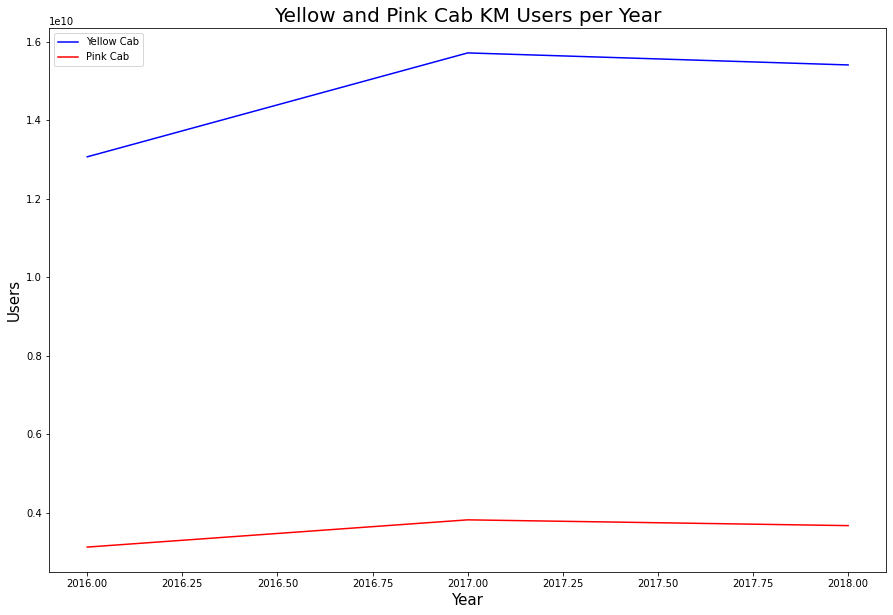

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(YellowCab.groupby('Year')['Users'].sum(), color = 'b', label = 'Yellow Cab')
plt.plot(PinkCab.groupby('Year')['Users'].sum(), color = 'r', label = 'Pink Cab')
plt.title('Yellow and Pink Cab KM Users per Year', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel('Users', size = 15)
plt.legend()

In [ ]:
YellowCab.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Month_sine',
       'Month_cos', 'Customer_ID', 'Payment_Mode', 'Profit', 'Gender', 'Age',
       'Income', 'Population', 'Users', 'Age_range', 'Cost_per_km',
       'Perc_Users'],
      dtype='object')

In [ ]:
YellowCab.columns


Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Month_sine',
       'Month_cos', 'Customer_ID', 'Payment_Mode', 'Profit', 'Gender', 'Age',
       'Income', 'Population', 'Users', 'Age_range', 'Cost_per_km',
       'Perc_Users'],
      dtype='object')

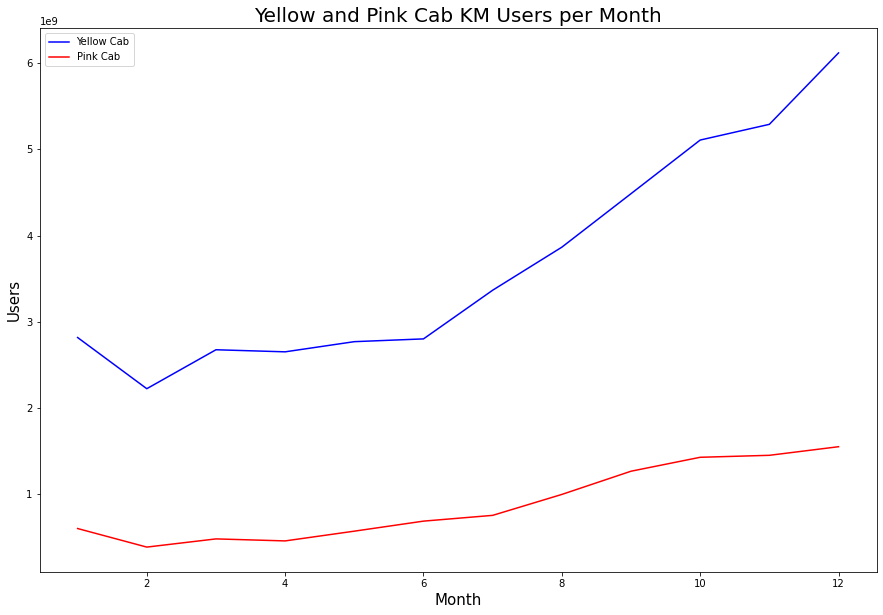

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(YellowCab.groupby(YellowCab.Date_of_Travel.dt.month)['Users'].sum(), color = 'b', label = 'Yellow Cab')
plt.plot(PinkCab.groupby(PinkCab.Date_of_Travel.dt.month)['Users'].sum(), color = 'r', label = 'Pink Cab')
plt.title('Yellow and Pink Cab KM Users per Month', size = 20)
plt.xlabel("Month", size = 15)
plt.ylabel('Users', size = 15)
plt.legend()

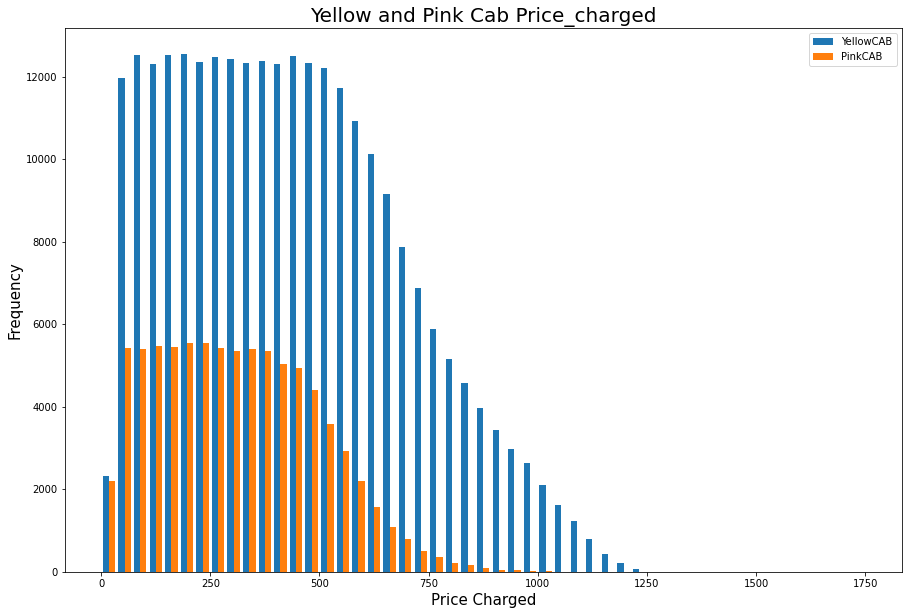

In [ ]:
bins = np.linspace(0, 1750, 50)
plt.figure(figsize = (15,10))
plt.hist([YellowCab['Price_Charged'], PinkCab['Price_Charged']], bins, label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Price_charged', size = 20)
plt.xlabel("Price Charged", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

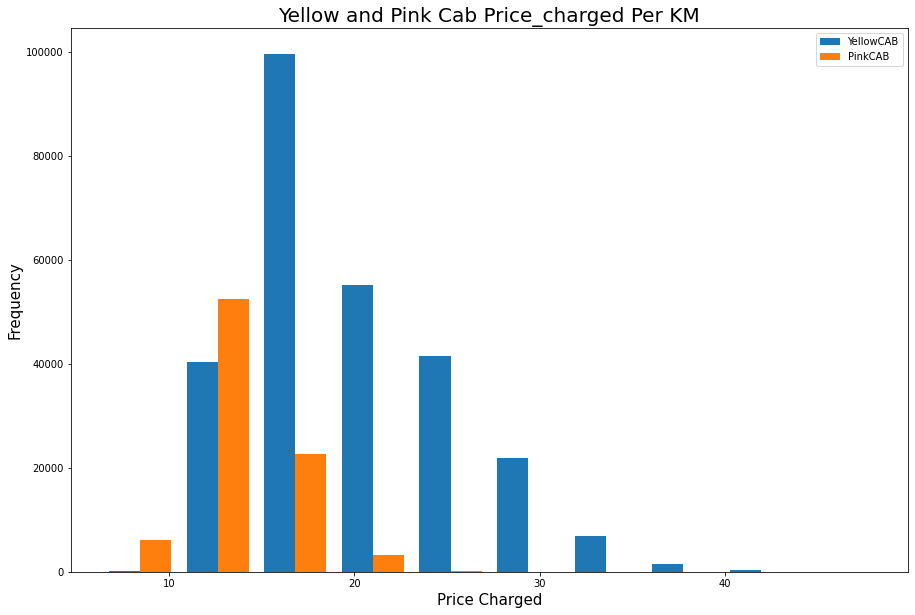

In [ ]:
bins = np.linspace(0, 1750, 50)
plt.figure(figsize = (15,10))
plt.hist([YellowCab['Price_Charged']/ YellowCab['KM_Travelled'], PinkCab['Price_Charged']/ PinkCab['KM_Travelled']],  label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Price_charged Per KM', size = 20)
plt.xlabel("Price Charged", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

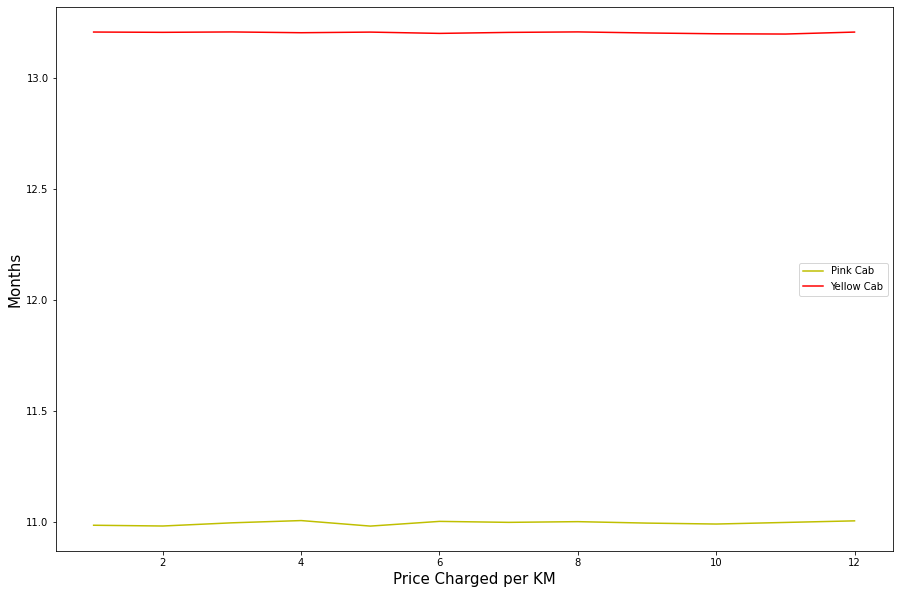

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(PinkCab.groupby(PinkCab['Date_of_Travel'].dt.month)['Cost_per_km'].mean(), color = 'y', label = 'Pink Cab')
plt.plot(YellowCab.groupby(YellowCab['Date_of_Travel'].dt.month)['Cost_per_km'].mean(), color = 'r', label = 'Yellow Cab')
plt.xlabel("Price Charged per KM", size = 15)
plt.ylabel('Months', size = 15)
plt.legend()

In [ ]:
print(datadf.groupby('Company')['Profit'].mean())

Company
Pink Cab       62.402160
Yellow Cab    144.404243
Name: Profit, dtype: float64


Text(0.5, 1.0, 'Profit Proportion of Both Companies in the database')

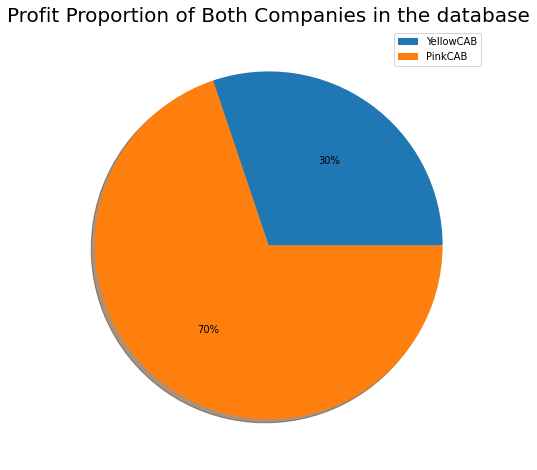

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(datadf.groupby('Company')['Profit'].mean(), shadow = True,  autopct='%1.0f%%',)
plt.legend(['YellowCAB', 'PinkCAB'])
plt.title('Profit Proportion of Both Companies in the database', size = 20)

In [ ]:
PinkCab_df = datadf[datadf['Company'] == 'Pink Cab']
YellowCab_df = datadf[datadf['Company'] == 'Yellow Cab']

In [ ]:
YellowCab_df['Profit'].mean()

144.40424348430858

In [ ]:
N_PinkCab_df = PinkCab_df.set_index('Date_of_Travel')
N_YellowCab_df = YellowCab_df.set_index('Date_of_Travel')

In [ ]:
import seaborn as sns
col_pal = sns.color_palette()

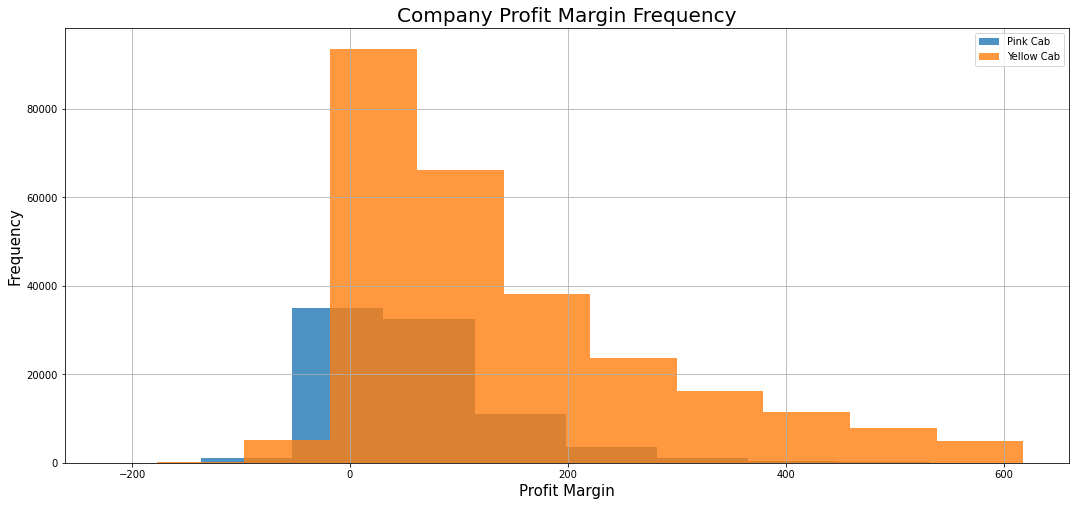

In [ ]:
plt.figure(figsize = (18,8))
datadf.groupby('Company')['Profit'].hist(alpha = 0.8)
plt.xlabel("Profit Margin", size = 15)
plt.ylabel('Frequency', size = 15)
plt.title("Company Profit Margin Frequency", size = 20)
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

Text(0.5, 1.0, 'Pink Cab Mean yearly Profit Distribution')

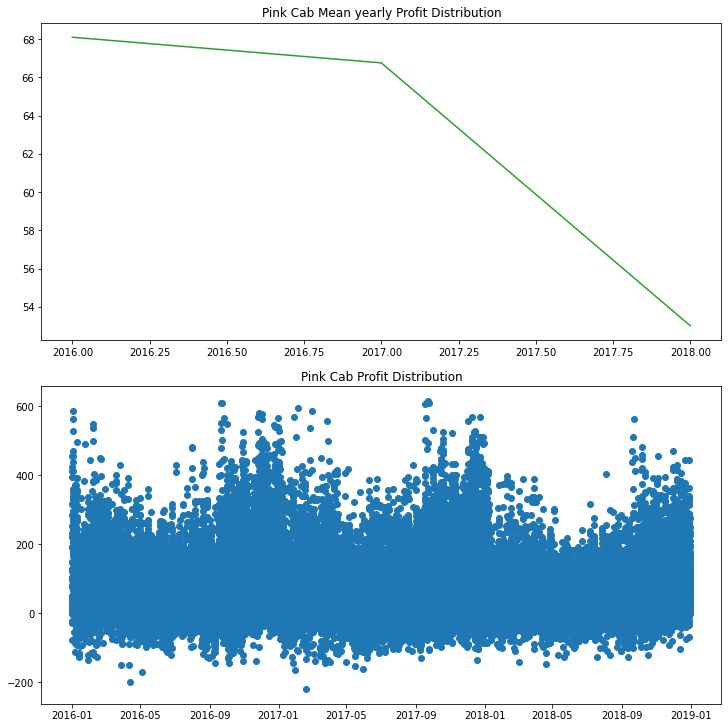

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout=True, figsize=(10, 10))
ax1.plot(N_PinkCab_df.groupby('Year')['Profit'].mean(), 'g-', color = col_pal[2])
ax2.scatter(N_PinkCab_df.index,N_PinkCab_df['Profit'],  color = col_pal[0])
ax2.set_title('Pink Cab Profit Distribution')
ax1.set_title('Pink Cab Mean yearly Profit Distribution')


Text(0.5, 1.0, 'Yellow Cab Mean yearly Profit Distribution')

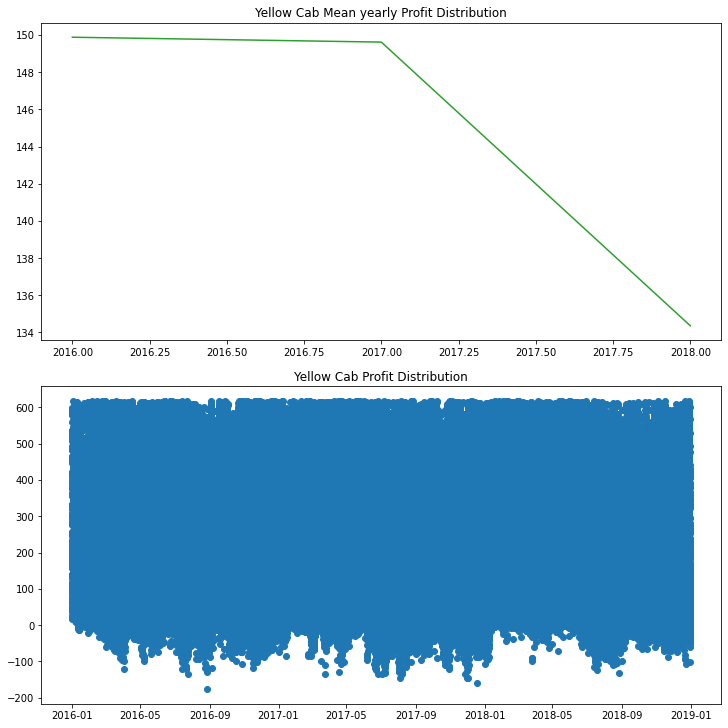

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout=True, figsize=(10, 10))
ax1.plot(N_YellowCab_df.groupby('Year')['Profit'].mean(), 'g-', color = col_pal[2])
ax2.scatter(N_YellowCab_df.index,N_YellowCab_df['Profit'],  color = col_pal[0])
ax2.set_title('Yellow Cab Profit Distribution')
ax1.set_title('Yellow Cab Mean yearly Profit Distribution')

In [ ]:
#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,20))
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(N_YellowCab_df['Profit'], ax = ax1, title = 'Yellow Cab Autocorrelation Chart', lags = 30)
#plot_pacf(N_YellowCab_df['Profit'], ax = ax2, title = 'Yellow Cab Partial Autocorrelation', lags=30)
#plt.show()
#there is significant autocorrelation and negative. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


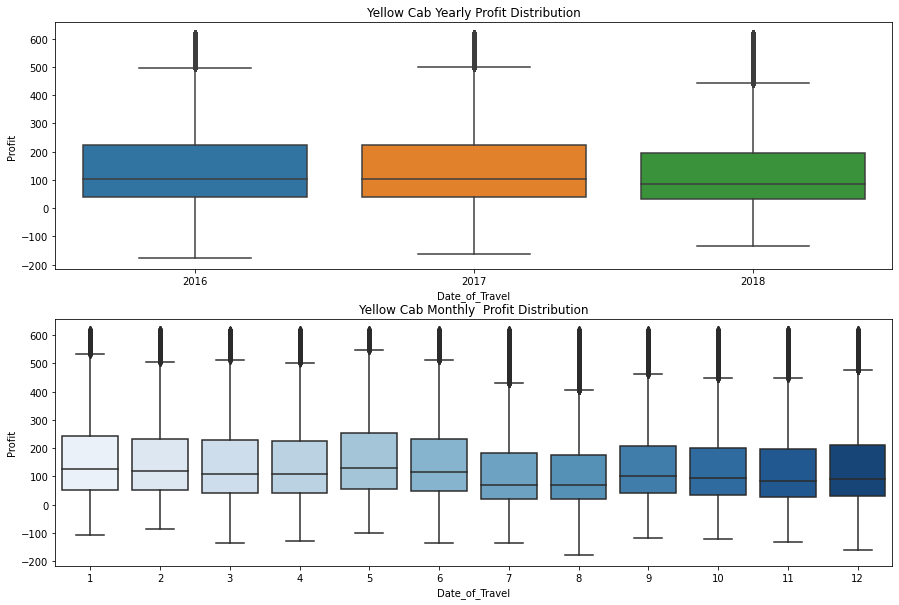

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,10))
sns.boxplot(N_YellowCab_df.index.year, N_YellowCab_df['Profit'], ax = ax1)
sns.boxplot(N_YellowCab_df.index.month, N_YellowCab_df['Profit'], palette = 'Blues', ax = ax2)
ax1.set_title ('Yellow Cab Yearly Profit Distribution')
ax2.set_title ('Yellow Cab Monthly  Profit Distribution')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pink Cab Monthly  Profit Distribution')

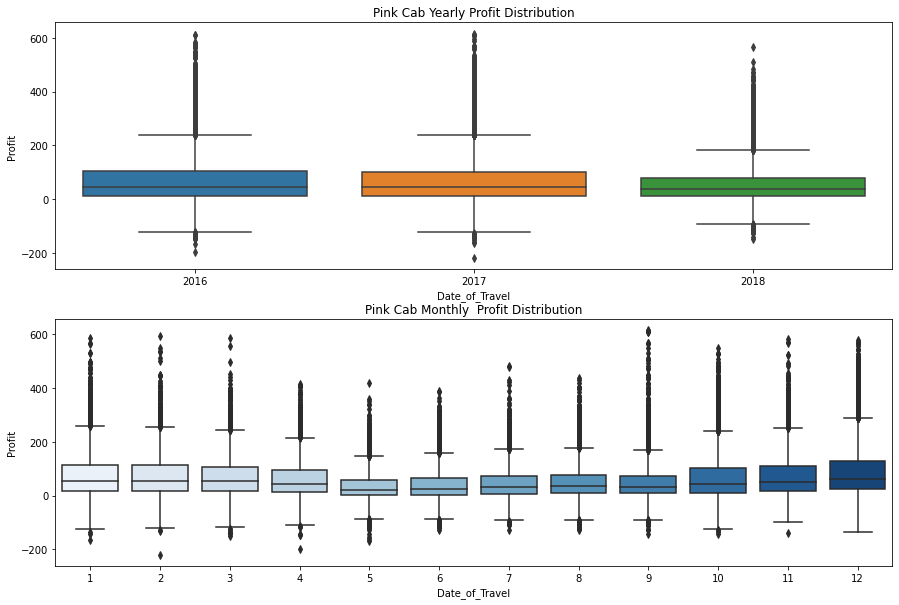

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,10))
sns.boxplot(N_PinkCab_df.index.year, N_PinkCab_df['Profit'], ax = ax1)
sns.boxplot(N_PinkCab_df.index.month, N_PinkCab_df['Profit'], palette = 'Blues', ax = ax2)
ax1.set_title ('Pink Cab Yearly Profit Distribution')
ax2.set_title ('Pink Cab Monthly  Profit Distribution')

In [ ]:
#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,20))
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(N_PinkCab_df['Profit'], ax = ax1, title = 'Pink Cab Autocorrelation Chart', lags = 30)
#lot_pacf(N_PinkCab_df['Profit'], ax = ax2, title = 'Pink Cab Partial Autocorrelation', lags=30)
#plt.show()
#there is significant autocorrelation and negative. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

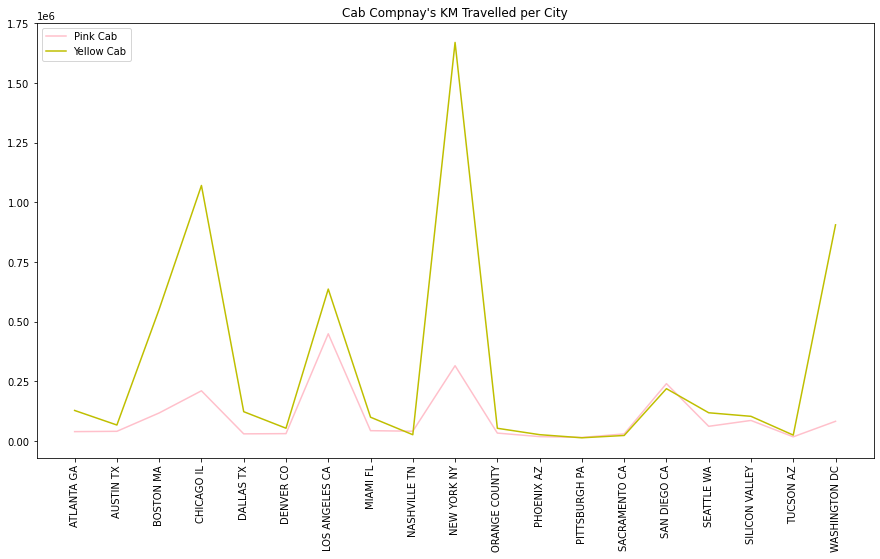

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(N_PinkCab_df.groupby('City')['KM_Travelled'].sum(), color = 'pink', label = 'Pink Cab')
plt.plot(N_YellowCab_df.groupby('City')['KM_Travelled'].sum(), color = 'y', label = 'Yellow Cab')
plt.title("Cab Compnay's KM Travelled per City")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

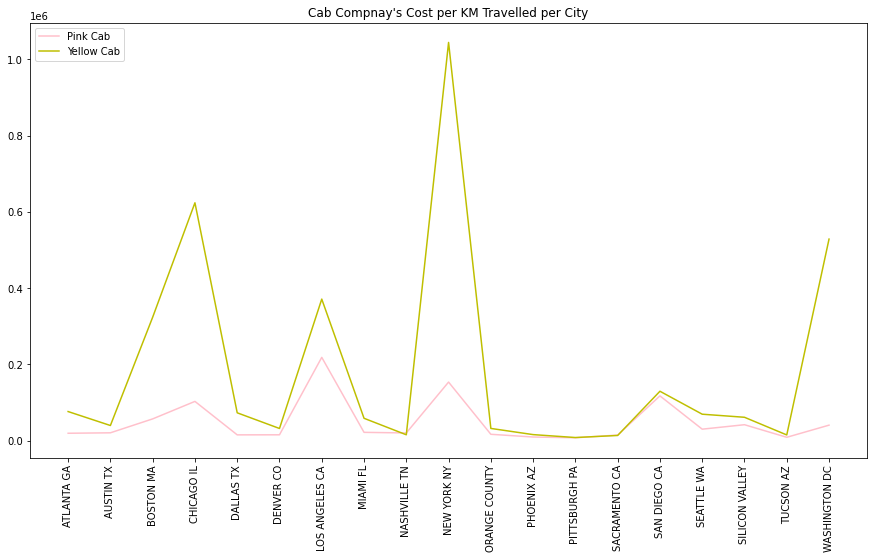

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(N_PinkCab_df.groupby('City')['Cost_per_km'].sum(), color = 'pink', label = 'Pink Cab')
plt.plot(N_YellowCab_df.groupby('City')['Cost_per_km'].sum(), color = 'y', label = 'Yellow Cab')
plt.title("Cab Compnay's Cost per KM Travelled per City")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

In [ ]:
print('Pink Cab Customers Age Range \n{} '.format(N_PinkCab_df['Age_range'].value_counts()))
print('Yellow Cab Customers Age Range \n{}'.format(N_YellowCab_df['Age_range'].value_counts()))


Pink Cab Customers Age Range 
less than 65    83862
Above 65          820
Name: Age_range, dtype: int64 
Yellow Cab Customers Age Range 
less than 65    264932
Above 65          2507
Name: Age_range, dtype: int64


In [ ]:
#coeff = datadf_numcol.corr()
#pval = datadf_numcol.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*coeff.shape)
#p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
#coeff.round(4).astype(str) + p
#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

In [ ]:
datadf_numcol = datadf.select_dtypes(np.number).copy()
datadf_numcol = datadf_numcol.drop(['Customer_ID', 'Transaction_ID'], axis = 1)

In [ ]:
N_PinkCab_df

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Month_sine,Month_cos,...,Payment_Mode,Profit,Gender,Age,Income,Population,Users,Age_range,Cost_per_km,Perc_Users
Date_of_Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-08,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016.0,1.0,5.000000e-01,0.866025,...,Card,57.315,Male,28,10813,814885,24701,less than 65,10.3,0.030312
2016-01-06,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016.0,1.0,5.000000e-01,0.866025,...,Card,23.666,Male,27,9237,814885,24701,less than 65,11.7,0.030312
2018-10-27,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.934,2018.0,10.0,-8.660254e-01,0.500000,...,Card,25.096,Male,27,9237,814885,24701,less than 65,10.6,0.030312
2016-01-02,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016.0,1.0,5.000000e-01,0.866025,...,Cash,27.568,Male,53,11242,814885,24701,less than 65,10.8,0.030312
2016-01-07,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016.0,1.0,5.000000e-01,0.866025,...,Cash,25.798,Male,23,23327,814885,24701,less than 65,10.6,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-23,10200082,Pink Cab,WASHINGTON DC,20.23,347.58,218.484,2017.0,7.0,-5.000000e-01,-0.866025,...,Cash,129.096,Male,58,10737,418859,127001,less than 65,10.8,0.303207
2017-11-19,10262863,Pink Cab,WASHINGTON DC,4.44,61.95,50.616,2017.0,11.0,-5.000000e-01,0.866025,...,Card,11.334,Male,39,15247,418859,127001,less than 65,11.4,0.303207
2018-12-02,10417014,Pink Cab,WASHINGTON DC,40.95,565.07,434.070,2018.0,12.0,-2.449294e-16,1.000000,...,Card,131.000,Male,39,15247,418859,127001,less than 65,10.6,0.303207


In [ ]:
kendcorr = datadf_numcol.corr(method= 'kendall')
kendcorr

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Month_sine,Month_cos,Profit,Age,Income,Population,Users,Cost_per_km,Perc_Users
KM_Travelled,1.000000,0.718120,0.898459,0.003988,0.007597,-0.007325,0.004581,0.325814,-0.000099,-0.000699,-0.022774,-0.020921,-0.004932,0.017630
Price_Charged,0.718120,1.000000,0.748530,-0.016175,-0.016533,0.026365,0.011449,0.592855,-0.001433,0.001372,0.122756,0.117201,0.104617,-0.086485
Cost_of_Trip,0.898459,0.748530,1.000000,0.003629,0.003868,-0.002999,0.003823,0.341355,0.000006,-0.000759,-0.016073,-0.004938,0.097987,0.023713
Year,0.003988,-0.016175,0.003629,1.000000,-0.022338,0.013613,0.017093,-0.041040,-0.000468,-0.001032,0.006391,0.004485,-0.001272,-0.006309
Month,0.007597,-0.016533,0.003868,-0.022338,1.000000,-0.411561,0.411197,-0.038559,-0.000971,0.000764,0.049167,0.029256,-0.022172,-0.062676
Month_sine,-0.007325,0.026365,-0.002999,0.013613,-0.411561,1.000000,0.017179,0.059134,-0.000163,-0.001461,-0.038149,-0.017264,0.025810,0.055543
Month_cos,0.004581,0.011449,0.003823,0.017093,0.411197,0.017179,1.000000,0.028676,-0.000390,0.001450,0.032521,0.025737,-0.004129,-0.034178
Profit,0.325814,0.592855,0.341355,-0.041040,-0.038559,0.059134,0.028676,1.000000,-0.003207,0.003268,0.262245,0.227495,0.076461,-0.210745
Age,-0.000099,-0.001433,0.000006,-0.000468,-0.000971,-0.000163,-0.000390,-0.003207,1.000000,0.003026,-0.000984,-0.001690,0.000634,0.003007
Income,-0.000699,0.001372,-0.000759,-0.001032,0.000764,-0.001461,0.001450,0.003268,0.003026,1.000000,0.010432,0.008530,-0.000080,-0.004849


In [ ]:
print('Mean Profit: {}'.format( datadf.groupby('Company')['Profit'].mean()), '\n')
print('Maximum Profit: {}'.format( datadf.groupby('Company')['Profit'].max()), '\n')
print('Minimum Profit: {}'.format( datadf.groupby('Company')['Profit'].min()))

Mean Profit: Company
Pink Cab       62.402160
Yellow Cab    144.404243
Name: Profit, dtype: float64 

Maximum Profit: Company
Pink Cab      615.995
Yellow Cab    618.188
Name: Profit, dtype: float64 

Minimum Profit: Company
Pink Cab     -220.0600
Yellow Cab   -176.9308
Name: Profit, dtype: float64


### Anova analysis for variables KM_travelled, Company and City in Cab data 

In [ ]:
YellowCab.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Month_sine',
       'Month_cos', 'Customer_ID', 'Payment_Mode', 'Profit', 'Gender', 'Age',
       'Income', 'Population', 'Users', 'Age_range', 'Cost_per_km',
       'Perc_Users'],
      dtype='object')

In [ ]:
yelcabmod2 = ols('KM_Travelled~City+Gender + Age + Payment_Mode+ Month', data = N_YellowCab_df).fit()
yelcabaov2 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov2)

                    df        sum_sq       mean_sq           F         PR(>F)
City              18.0  1.193700e+05   6631.669181   45.542403  3.603529e-162
Gender             1.0  1.730251e+02    173.025052    1.188234   2.756870e-01
Payment_Mode       1.0  5.384527e+00      5.384527    0.036978   8.475105e-01
Age                1.0  1.142090e+01     11.420901    0.078432   7.794338e-01
Month              1.0  1.496002e+04  14960.020160  102.736618   3.866719e-24
Residual      267416.0  3.893985e+07    145.615268         NaN            NaN


In [ ]:
yelcabmod3 = ols('Users~City+Gender + Age + Payment_Mode+ Month', data = N_YellowCab_df).fit()
yelcabaov3 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov3)

                    df        sum_sq       mean_sq           F         PR(>F)
City              18.0  1.193700e+05   6631.669181   45.542403  3.603529e-162
Gender             1.0  1.730251e+02    173.025052    1.188234   2.756870e-01
Payment_Mode       1.0  5.384527e+00      5.384527    0.036978   8.475105e-01
Age                1.0  1.142090e+01     11.420901    0.078432   7.794338e-01
Month              1.0  1.496002e+04  14960.020160  102.736618   3.866719e-24
Residual      267416.0  3.893985e+07    145.615268         NaN            NaN


In [ ]:
yelcabmod4 = ols('Profit~City+Gender + Age + Payment_Mode+ Month', data = N_YellowCab_df).fit()
yelcabaov4 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov4)

                    df        sum_sq       mean_sq           F         PR(>F)
City              18.0  1.193700e+05   6631.669181   45.542403  3.603529e-162
Gender             1.0  1.730251e+02    173.025052    1.188234   2.756870e-01
Payment_Mode       1.0  5.384527e+00      5.384527    0.036978   8.475105e-01
Age                1.0  1.142090e+01     11.420901    0.078432   7.794338e-01
Month              1.0  1.496002e+04  14960.020160  102.736618   3.866719e-24
Residual      267416.0  3.893985e+07    145.615268         NaN            NaN


In [ ]:
pinkcabmod2 = ols('KM_Travelled~City+Gender + Age + Payment_Mode+ Month', data = N_PinkCab_df).fit()
pinkcabaov2 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov2)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.846678e+03  158.148804  1.057437  0.389762
Gender            1.0  5.138528e+01   51.385278  0.343580  0.557772
Payment_Mode      1.0  1.235980e+02  123.597995  0.826419  0.363313
Age               1.0  2.194971e+02  219.497101  1.467633  0.225723
Month             1.0  6.414927e+01   64.149270  0.428924  0.512519
Residual      84659.0  1.266148e+07  149.558585       NaN       NaN


In [ ]:
pinkcabmod3 = ols('Users~City+Gender + Age + Payment_Mode+ Month', data = N_PinkCab_df).fit()
pinkcabaov3 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov3)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.846678e+03  158.148804  1.057437  0.389762
Gender            1.0  5.138528e+01   51.385278  0.343580  0.557772
Payment_Mode      1.0  1.235980e+02  123.597995  0.826419  0.363313
Age               1.0  2.194971e+02  219.497101  1.467633  0.225723
Month             1.0  6.414927e+01   64.149270  0.428924  0.512519
Residual      84659.0  1.266148e+07  149.558585       NaN       NaN


In [ ]:
pinkcabmod4 = ols('Profit~City+Gender + Age + Payment_Mode+ Month', data = N_PinkCab_df).fit()
pinkcabaov4 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov4)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.846678e+03  158.148804  1.057437  0.389762
Gender            1.0  5.138528e+01   51.385278  0.343580  0.557772
Payment_Mode      1.0  1.235980e+02  123.597995  0.826419  0.363313
Age               1.0  2.194971e+02  219.497101  1.467633  0.225723
Month             1.0  6.414927e+01   64.149270  0.428924  0.512519
Residual      84659.0  1.266148e+07  149.558585       NaN       NaN


### Anova analysis for variables Cost of Trip, Company and City in Cab data 

In [ ]:
pinkcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = N_PinkCab_df).fit()
pinkcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(pinkcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.105824e+07  2.836569e+06  542.191043  0.000000
Gender            1.0  7.003657e+02  7.003657e+02    0.133870  0.714453
Payment_Mode      1.0  1.097477e+03  1.097477e+03    0.209775  0.646945
Residual      84661.0  4.429191e+08  5.231678e+03         NaN       NaN


In [ ]:
yelcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = N_YellowCab_df).fit()
yelcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(yelcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.105824e+07  2.836569e+06  542.191043  0.000000
Gender            1.0  7.003657e+02  7.003657e+02    0.133870  0.714453
Payment_Mode      1.0  1.097477e+03  1.097477e+03    0.209775  0.646945
Residual      84661.0  4.429191e+08  5.231678e+03         NaN       NaN


In [ ]:
N_PinkCab_df.drop(['Year', 'Month', 'Age_range'], axis = 1, inplace = True)
N_YellowCab_df.drop(['Year', 'Month', 'Age_range'], axis = 1, inplace = True)

In [ ]:
N_PinkCab_df.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month_sine', 'Month_cos', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Gender', 'Age', 'Income', 'Population',
       'Users', 'Cost_per_km', 'Perc_Users'],
      dtype='object')

In [ ]:
num =['float64', 'int64']
PinkCab_numcol = N_PinkCab_df.select_dtypes(include= num)
YellowCab_numcol = N_YellowCab_df.select_dtypes(include= num)


Correlation Analysis of the variables

In [ ]:
pinkcorr = PinkCab_numcol.corr()
yellowcorr = YellowCab_numcol.corr()
yelpval = YellowCab_numcol.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*yellowcorr.shape)
yp = yelpval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
yellowcorr.round(4).astype(str) + yp

#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Month_sine,Month_cos,Customer_ID,Profit,Age,Income,Population,Users,Cost_per_km,Perc_Users
Transaction_ID,1.0***,0.0108***,-0.0308***,0.0102***,-0.1883***,0.1899***,-0.0263***,-0.0675***,-0.0013,0.0001,0.0397***,0.0264***,-0.0037*,-0.0325***
KM_Travelled,0.0108***,1.0***,0.8776***,0.9935***,-0.0155***,0.0091***,0.0286***,0.4783***,0.0012,-0.0017,-0.0533***,-0.0454***,0.0054***,0.0272***
Price_Charged,-0.0308***,0.8776***,1.0***,0.8732***,0.038***,0.0001,-0.1718***,0.8362***,-0.0025,0.0023,0.2764***,0.2253***,0.0124***,-0.1737***
Cost_of_Trip,0.0102***,0.9935***,0.8732***,1.0***,-0.0152***,0.0089***,0.0277***,0.4628***,0.0012,-0.0015,-0.0516***,-0.0439***,0.1054***,0.0266***
Month_sine,-0.1883***,-0.0155***,0.038***,-0.0152***,1.0***,-0.0346***,0.0442***,0.0862***,0.0022,-0.0016,-0.0593***,-0.0342***,0.0022,0.0596***
Month_cos,0.1899***,0.0091***,0.0001,0.0089***,-0.0346***,1.0***,-0.0365***,-0.0098***,-0.0008,0.004**,0.062***,0.0421***,-0.0009,-0.0451***
Customer_ID,-0.0263***,0.0286***,-0.1718***,0.0277***,0.0442***,-0.0365***,1.0***,-0.3437***,-0.0055***,-0.0155***,-0.6682***,-0.6225***,-0.003,0.8548***
Profit,-0.0675***,0.4783***,0.8362***,0.4628***,0.0862***,-0.0098***,-0.3437***,1.0***,-0.006***,0.006***,0.5607***,0.4593***,-0.096***,-0.3458***
Age,-0.0013,0.0012,-0.0025,0.0012,0.0022,-0.0008,-0.0055***,-0.006***,1.0***,0.0012,-0.0083***,-0.0058***,0.0001,-0.0031
Income,0.0001,-0.0017,0.0023,-0.0015,-0.0016,0.004**,-0.0155***,0.006***,0.0012,1.0***,0.0137***,0.0126***,0.0008,-0.011***


In [ ]:
pinkpval = pinkcorr.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*pinkcorr.shape)
pp = pinkpval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
pinkcorr.round(4).astype(str) + pp
#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Month_sine,Month_cos,Customer_ID,Profit,Age,Income,Population,Users,Cost_per_km,Perc_Users
Transaction_ID,1.0***,0.0025,-0.0165,0.0032,-0.1614,0.1987,-0.0144,-0.0448,-0.0024,-0.0063,0.0356,0.028,0.0082,-0.0091
KM_Travelled,0.0025,1.0***,0.9299***,0.9934***,0.0051,-0.0006,-0.0007,0.4456***,-0.0043,0.0005,0.0024,0.0046,0.0028,0.0039
Price_Charged,-0.0165,0.9299***,1.0***,0.924***,0.0237,0.0834,-0.0559,0.7351***,-0.0069,0.0024,0.111,0.0863,0.0046,-0.0329
Cost_of_Trip,0.0032,0.9934***,0.924***,1.0***,0.0052,-0.0004,-0.0007,0.4198***,-0.005,0.0004,0.0024,0.0046,0.1039,0.0039
Month_sine,-0.1614,0.0051,0.0237,0.0052,1.0***,-0.0269,0.05,0.047,-0.0023,-0.0005,-0.0949,-0.064,-0.0017,0.0558
Month_cos,0.1987,-0.0006,0.0834,-0.0004,-0.0269,1.0***,-0.013,0.1986,0.0,-0.0024,0.0673,0.0583,-0.0003,0.0124
Customer_ID,-0.0144,-0.0007,-0.0559,-0.0007,0.05,-0.013,1.0***,-0.1316,-0.0033,-0.0057,-0.5623***,-0.606***,-0.0003,0.5658***
Profit,-0.0448,0.4456***,0.7351***,0.4198***,0.047,0.1986,-0.1316,1.0***,-0.0074,0.0049,0.259,0.1968,-0.1733,-0.0851
Age,-0.0024,-0.0043,-0.0069,-0.005,-0.0023,0.0,-0.0033,-0.0074,1.0***,0.0108,-0.0122,-0.0062,-0.0051,0.0026
Income,-0.0063,0.0005,0.0024,0.0004,-0.0005,-0.0024,-0.0057,0.0049,0.0108,1.0***,0.004,0.0033,0.0006,-0.0014


#Using Bayesian Optimization to Predict Each Cab Company Profit for the Following Year 

In [ ]:
PinkTestsize = int(N_PinkCab_df.shape[0]*.3)
Yellowtestsize = int(N_YellowCab_df.shape[0]*.3)
Yellowtrain = N_YellowCab_df.sort_index()[:-Yellowtestsize]
Yellowtest = N_YellowCab_df.sort_index()[-Yellowtestsize:]
Pinktrain = N_PinkCab_df.sort_index()[:-PinkTestsize]
Pinktest = N_PinkCab_df.sort_index()[-PinkTestsize:]

In [ ]:
Yellowtrain.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month_sine', 'Month_cos', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Gender', 'Age', 'Income', 'Population',
       'Users', 'Cost_per_km', 'Perc_Users'],
      dtype='object')

In [ ]:
YLxtrain = Yellowtrain.loc[:, ~Yellowtrain.columns.isin(['Profit', 'Company'])]
YLxtest = Yellowtest.loc[:, ~Yellowtest.columns.isin(['Profit', 'Company'])]
Pxtrain = Pinktrain.loc[:, ~Pinktrain.columns.isin(['Profit', 'Company'])]
Pxtest = Pinktest.loc[:, ~Pinktest.columns.isin(['Profit', 'Company'])]
YLytrain = Yellowtrain['Profit'] 
YLytest = Yellowtest['Profit'] 
Pytrain = Pinktrain['Profit'] 
Pytest = Pinktest['Profit'] 

In [ ]:
!pip install xgboost
import xgboost as xgb
#from sklearn.model_selection import train_test_split
#YLxtrain, YLxtest, YLytrain, YLytest = train_test_split(YellowX, YellowY, test_size = 0.2, random_state = 1)
#Pxtrain, Pxtest, Pytrain, Pytest = train_test_split(PinkX, PinkY, test_size = 0.2, random_state = 1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Pxtrain.columns

Index(['Transaction_ID', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month_sine', 'Month_cos', 'Customer_ID',
       'Payment_Mode', 'Gender', 'Age', 'Income', 'Population', 'Users',
       'Cost_per_km', 'Perc_Users'],
      dtype='object')

In [ ]:
YLxtest.columns

Index(['Transaction_ID', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month_sine', 'Month_cos', 'Customer_ID',
       'Payment_Mode', 'Gender', 'Age', 'Income', 'Population', 'Users',
       'Cost_per_km', 'Perc_Users'],
      dtype='object')

In [ ]:
#converting the dataframe to show only unique values in each column
ptr = dict()
for col in Pxtrain.select_dtypes(include = 'object'): 
  ptr[col] = frozenset (Pxtrain.select_dtypes(include = 'object')[col])

ptest = dict()
for col in Pxtest.select_dtypes(include = 'object'): 
  ptest[col] = frozenset(Pxtest.select_dtypes(include = 'object')[col])

In [ ]:
#Checking if there is any unique categorical value in validation set but missing in training set
ptest.items()- ptr.items()


set()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
oneh = OneHotEncoder()


In [ ]:
#cats_cols = list (YLxtest.select_dtypes(include = 'object'))

#com_pipe = ColumnTransformer([
    #('cat', OneHotEncoder(), cats_cols),])
#prep_PinktrainX = com_pipe.fit_transform(Pxtrain)
#prep_YLxtrainx = com_pipe.fit_transform(YLxtrain)
#prep_YLxtrainx = pd.DataFrame(prep_YLxtrainx.toarray(), index = YLxtrain.index)
#prep_PinktrainX = pd.DataFrame(prep_PinktrainX.toarray(), index = Pxtrain.index)

In [ ]:
#prep_PinktestX = com_pipe.transform(Pxtest)
#prep_YLxtestx = com_pipe.transform(YLxtest)
#prep_YLxtestx = pd.DataFrame(prep_YLxtestx.toarray(), index = YLxtest.index)
#prep_PinktestX = pd.DataFrame(prep_PinktestX.toarray(), index = Pxtest.index)


In [ ]:
def catencodte (model, data, name): 
  cat_col = data.select_dtypes(include = 'object')
  if 'train' in name:
    conv_cat = model.fit_transform(cat_col)
  else: 
    conv_cat = model.transform(cat_col)
  df_conv_cat = pd.DataFrame(conv_cat.toarray(), index = data.index )
  data.drop(cat_col.columns, inplace = True, axis = 1)
  data = pd.concat([data, df_conv_cat], axis = 1)
  return data

In [ ]:
#def catensdsfcodte (model, train, test): 
  #cat_col = train.select_dtypes(include = 'object').columns
  #tr_cat = model.fit_tranform(train[cat_col])
  #df_tr_cat = pd.DataFrame(tr_cat.toarray(), index = train.index )
  #train.drop(cat_col, inplace = True, axis = 1)
  #train = pd.concat([train, df_tr_cat], axis = 1)
  #ts_cat = model.transform(test[cat_col])
  #df_ts_cat = pd.DataFrame(ts_cat.toarray(), index = test.index)
  #test.drop(cat_col, inplace = True, axis = 1)
  #test = pd.concat([test, df_ts_cat])
  #return train, test

In [ ]:
#PtrainX, PtestX = catencodte(oneh, Pxtrain, Pxtest)

In [ ]:
Pxtrain.columns

Index(['Transaction_ID', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month_sine', 'Month_cos', 'Customer_ID',
       'Payment_Mode', 'Gender', 'Age', 'Income', 'Population', 'Users',
       'Cost_per_km', 'Perc_Users'],
      dtype='object')

In [ ]:
from varname import nameof
PtrainX = catencodte(oneh, Pxtrain, nameof(Pxtrain))
YLtrainX = catencodte(oneh,  YLxtrain, nameof(YLxtrain))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
PtrainX.columns

Index(['Transaction_ID',   'KM_Travelled',  'Price_Charged',   'Cost_of_Trip',
           'Month_sine',      'Month_cos',    'Customer_ID',            'Age',
               'Income',     'Population',          'Users',    'Cost_per_km',
           'Perc_Users',                0,                1,                2,
                      3,                4,                5,                6,
                      7,                8,                9,               10,
                     11,               12,               13,               14,
                     15,               16,               17,               18,
                     19,               20,               21,               22],
      dtype='object')

In [ ]:
PtestX = catencodte(oneh, Pxtest, nameof(Pxtest))
YLtestX = catencodte(oneh, YLxtest, nameof(YLxtest))

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
YLdtrain, YLdtest = xgb.DMatrix(YLtrainX, YLytrain), xgb.DMatrix(YLtestX, YLytest)
Pdtrain, Pdtest = xgb.DMatrix(PtrainX, Pytrain), xgb.DMatrix(PtestX, Pytest) 

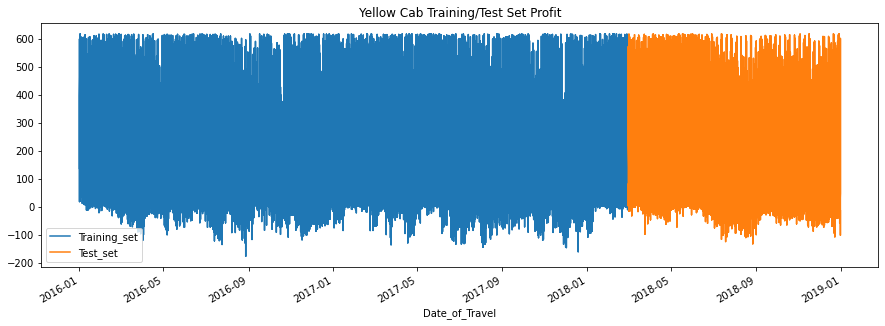

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
YLytrain.plot(ax = ax, label = 'Training_set')
YLytest.plot(ax = ax, label = 'Test_set')
plt.title('Yellow Cab Training/Test Set Profit')
plt.legend()
plt.show()

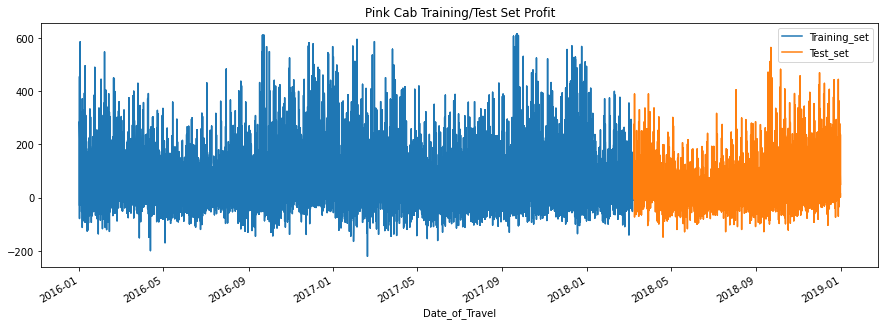

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
Pytrain.plot(ax = ax, label = 'Training_set')
Pytest.plot(ax = ax, label = 'Test_set')
plt.title('Pink Cab Training/Test Set Profit')
plt.legend()
plt.show()

In [ ]:
#Creating Base Model to see normal scoring
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit
cv = KFold(n_splits= 5, random_state = 0, shuffle = True)

In [ ]:
#xgb_rg = xgb.XGBRegressor()
#YLscores = cross_val_score(xgb_rg, YLtrainX, YLytrain, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
#print('Yellow Cab mean score {} and std score'.format(np.mean(YLscores), np.std(YLscores)))
#print('Yellow Cab Scores {}'.format(YLscores))

In [ ]:
#Pscores = cross_val_score(xgb_rg, PtrainX, Pytrain, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
#print('Pink Cab mean score {} and std score'.format(np.mean(Pscores), np.std(Pscores)))
#print('Pink Cab Scores {}'.format(Pscores))

In [ ]:
def rmse_score(params, train, test): 
  model = xgb.train(params, train, num_boost_round = 100, evals = [(test, 'eval')], 
                    early_stopping_rounds= 10, verbose_eval = 0)
  result = model.eval(test)
  results = float(str(result).split(':')[1])
  return(results)


In [ ]:
yellowCabFR = rmse_score({}, YLdtrain, YLdtest)
pinkCabFR = rmse_score({}, Pdtrain, Pdtest)
print('Yellow Cab first RMSE Score {}'.format(yellowCabFR))
print('Pink Cab first RMSE Score {}'.format(pinkCabFR))

Yellow Cab first RMSE Score 4.310668
Pink Cab first RMSE Score 2.97508


In [ ]:
!pip install optuna
import optuna
from optuna import trial, visualization 
from optuna.samplers import TPESampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 23.3 MB/s 
     |████████████████████████████████| 81 kB 13.7 MB/s 
     |████████████████████████████████| 210 kB 63.5 MB/s 
     |████████████████████████████████| 78 kB 9.3 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
     |████████████████████████████████| 147 kB 66.0 MB/s 
     |████████████████████████████████| 112 kB 83.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=c80886f1923d1d0ab7201c6168c3373e6601395556941c167313258df0db7813
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


In [ ]:
def objetv ( trial, train, test):
  params = { # did not use n_estimator to prevent overfitt, early stop will be used
      'max_depth': trial.suggest_int('max_depth', 3, 20), 
      'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 6), 
      'reg_lambda': trial.suggest_uniform('reg_lambda', 0, 2),
      'min_child_weight': trial.suggest_int('min_child_weight', 0, 5), 
      'gamma': trial.suggest_uniform('gamma', 0,4), 
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.05, 0.8), 
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1), 
      'sub_sample': trial.suggest_uniform('sub_sample', 0.4, 1), 
      'n_thread': -1
  } 
  return(rmse_score(params, train, test))


In [ ]:
funcY = lambda trial: objetv(trial, YLdtrain, YLdtest) 
funcP = lambda trial: objetv(trial, Pdtrain, Pdtest) 

In [ ]:
study1 = optuna.create_study(direction='minimize', sampler = TPESampler())
YStudy1 = study1.optimize(funcY, n_trials= 50, show_progress_bar= True)

[I 2022-12-26 08:14:55,755] A new study created in memory with name: no-name-84562ee9-84f1-415a-a46e-9245855288fe
/usr/local/lib/python3.8/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-121-3f7534f88189>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 6),
<ipython-input-121-3f7534f88189>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda', 0, 2),
<ipython-input-121-3f7534f88189>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_uniform('gamma', 0,4),
<ipython-input-121-3f7534f88189>:8: FutureWarning: suggest_loguniform has been depr

[I 2022-12-26 08:15:28,024] Trial 0 finished with value: 21.426422 and parameters: {'max_depth': 3, 'reg_alpha': 4.070189790638739, 'reg_lambda': 0.016416794536283197, 'min_child_weight': 2, 'gamma': 2.0376180136053175, 'learning_rate': 0.06715173883080815, 'colsample_bytree': 0.6536591354671092, 'sub_sample': 0.5997030119892661}. Best is trial 0 with value: 21.426422.
[I 2022-12-26 08:15:48,695] Trial 1 finished with value: 7.738068 and parameters: {'max_depth': 4, 'reg_alpha': 5.217346058849721, 'reg_lambda': 1.6508143200671146, 'min_child_weight': 5, 'gamma': 0.31838526502642717, 'learning_rate': 0.37137510643386906, 'colsample_bytree': 0.8057241581147443, 'sub_sample': 0.9457884206426661}. Best is trial 1 with value: 7.738068.
[I 2022-12-26 08:18:09,037] Trial 2 finished with value: 1.528206 and parameters: {'max_depth': 20, 'reg_alpha': 3.9001662037408558, 'reg_lambda': 1.535125241036517, 'min_child_weight': 3, 'gamma': 0.8924602002273652, 'learning_rate': 0.30031985061562877, 'co

In [ ]:
print('Yellow Cab Accuracy: {}'.format(study1.best_trial.values[0]))
print('Yellow Cab Best number of estimator: {}'.format(study1.best_trial.number))
print('Yellow Cab Best parameters: {}'.format(study1.best_params))

Yellow Cab Accuracy: 1.245984
Yellow Cab Best number of estimator: 22
Yellow Cab Best parameters: {'max_depth': 18, 'reg_alpha': 0.06199421295189747, 'reg_lambda': 1.784676279011757, 'min_child_weight': 4, 'gamma': 1.7031164445705307, 'learning_rate': 0.18353880692400568, 'colsample_bytree': 0.9902103478860641, 'sub_sample': 0.4856949036051514}


In [ ]:
optuna.visualization.plot_optimization_history(study1)

In [ ]:
optuna.visualization.plot_slice(study1)

In [ ]:
study2 = optuna.create_study(direction='minimize', sampler = TPESampler())
study2.optimize(funcP, n_trials= 50, show_progress_bar= True)

In [ ]:
print('Pink Cab Accuracy: {}'.format(study2.best_trial.values[0]))
print('Pink Cab Best number of estimator: {}'.format(study2.best_trial.number))
print('Pink Cab Best parameters: {}'.format(study2.best_params))

Pink Cab Accuracy: 1.293381
Pink Cab Best number of estimator: 14
Pink Cab Best parameters: {'max_depth': 20, 'reg_alpha': 0.3716093230436771, 'reg_lambda': 1.4676371970253799, 'min_child_weight': 4, 'gamma': 1.0653012222343894, 'learning_rate': 0.2058441005023561, 'colsample_bytree': 0.9947698352903726, 'sub_sample': 0.5061575305003895}


In [ ]:
Yellmodel = xgb.XGBRFRegressor(**study1.best_params, n_estimators= 42)
Pinkmodel = xgb.XGBRFRegressor(**study2.best_params, n_estimators= 11)
Yellmodel = Yellmodel.fit(YLtrainX, YLytrain)
Pinkmodel = Pinkmodel.fit(PtrainX, Pytrain)
Yellpred = Yellmodel.predict(YLtestX)
Pinkpred = Pinkmodel.predict(PtestX)

[09:56:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
YLytest

Date_of_Travel
2018-03-01     81.1180
2018-03-01     35.1708
2018-03-01    154.0392
2018-03-01    183.3320
2018-03-01     78.6616
                ...   
2018-12-31      3.8340
2018-12-31     80.8808
2018-12-31     37.8720
2018-12-31    109.1540
2018-12-31    -14.2864
Name: Profit, Length: 80231, dtype: float64

In [ ]:
Ypredtn = pd.DataFrame(Yellpred, columns = ['Pred_Profit'], index = YLytest.index)

In [ ]:
Ppredtn = pd.DataFrame(Pinkpred, columns = ['Pred_Profit'], index = Pytest)

In [ ]:
np.mean(Ypredtn), np.mean(Ppredtn)

(Pred_Profit    24.663265
 dtype: float32, Pred_Profit    10.898921
 dtype: float32)

In [ ]:
np.std(Ypredtn), np.std(Ppredtn)

(Pred_Profit    25.135298
 dtype: float32, Pred_Profit    12.488884
 dtype: float32)

From the result of the analysis and prediction, it can be seen that even though the Yellow Cab company is involved in more activties, more km travelled and acquired more profit that the Pink can company, it can be seen through the standard deviation that the profit volatility of the Yellow cab company is high than the Pink cab company. Hence, while it is predicted that investment in the Yellow Cab company will yeild more profit all things being equal, a slight change in the conditions of the market or other factors will lead to greather loss if invested in Yellow cab company. Investors who are ready to take more risk can invest in the Yellow Cab company otherwise the Pink cab company would be a better option. 